# Assigment 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numba import jit
import random
from mpl_toolkits import mplot3d

%matplotlib notebook

In [3]:
@jit
def mandelbrot(z, maxiter, horizon, log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az)) / np.log(2) + log_horizon
        z = z * z + c
    return 0


@jit
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    horizon = 2.0**40
    log_horizon = np.log(np.log(horizon)) / np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j * r2[j], maxiter, horizon,
                                  log_horizon)
    return (r1, r2, n3)


@jit
def mandelbrot_plot(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x, y, z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height,
                             maxiter)

    fig, ax = plt.subplots(figsize=(width, height), dpi=72)
    ticks = np.arange(0, img_width, 3 * dpi)
    x_ticks = xmin + (xmax - xmin) * ticks / img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax - ymin) * ticks / img_width
    plt.yticks(ticks, y_ticks)

    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T, cmap=cmap, origin='lower', norm=norm)

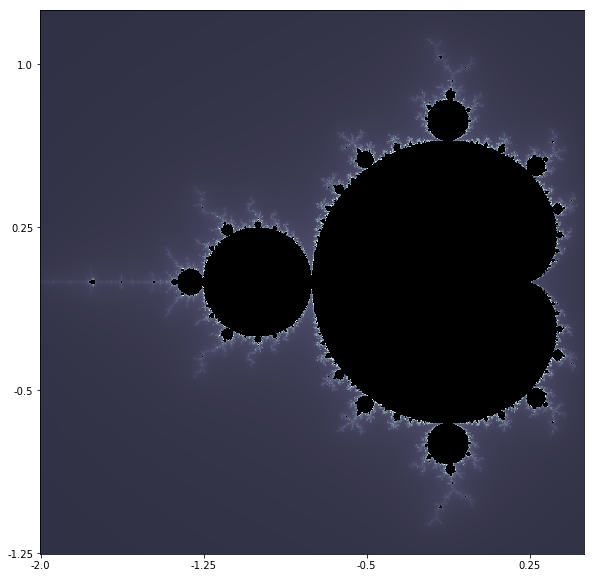

In [4]:
mandelbrot_plot(-2.0, 0.5, -1.25, 1.25, cmap='bone', maxiter=800)

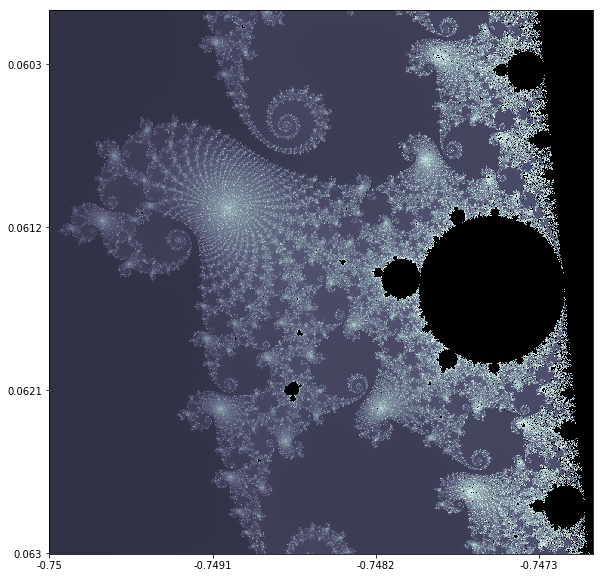

In [5]:
mandelbrot_plot(-0.75, -0.747, 0.063, 0.06, cmap='bone', maxiter=8000)

In [6]:
# Best know estimate according to:
# mrob.com/pub/muency/areaofthemandelbrotset.html


@jit
def real():
    return 1.506591856 + 2.54 * (10**-8)


@jit
def checkInMS(z, maxiter, horizon, log_horizon):
    #     print(z)
    if mandelbrot(z, maxiter, horizon, log_horizon) == 0:
        return 1.0
    return 0.0


@jit
def MonteCarlo(s, i, xmin, xmax, ymin, ymax):
    horizon = 2.0**40
    log_horizon = np.log(np.log(horizon)) / np.log(2)
    area = (xmax - xmin) * (ymax - ymin)
    ctr = 0
    for j in range(s):
        x = xmin + (xmax - xmin) * random.random()
        y = ymin + (ymax - ymin) * random.random()
        z = x + 1j * y
        ctr += checkInMS(z, i, horizon, log_horizon)
    return (ctr / s) * area


@jit
def lhs(n):
    lower_lim = np.arange(0, n)/n
    upper_lim = np.arange(1, n+1)/n
    points = np.random.uniform(low=lower_lim, high=upper_lim, size=[2, n]).T
    np.random.shuffle(points[:, 1])

    return points


@jit
def MonteCarlolhs(s, i, xmin, xmax, ymin, ymax, display="off"):
    horizon = 2.0**40
    log_horizon = np.log(np.log(horizon)) / np.log(2)
    area = (xmax - xmin) * (ymax - ymin)
    ctr = 0
    samples = lhs(s)

    if display == "on":
        plt.figure(figsize=[5, 5])
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.scatter(samples[:, 0], samples[:, 1], c="r")

        plt.show

    for sample in samples:
        x = xmin + (xmax - xmin) * sample[0]
        y = ymin + (ymax - ymin) * sample[1]
        z = x + 1j * y
        ctr += checkInMS(z, i, horizon, log_horizon)
    return (ctr / s) * area

In [ ]:
result = MonteCarlo(1000000, 8000, -2.0, 0.5, -1.25, 1.25)
print("Approximated with Monte carlo: {}".format(result))
print("Real value: {}".format(real()))

In [ ]:
result = MonteCarlolhs(1000000, 8000, -2.0, 0.5, -1.25, 1.25)
print("Approximated with Monte carlo: {}".format(result))
print("Real value: {}".format(real()))

In [ ]:

def MonteCarlo2(s, i, xmin, xmax, ymin, ymax):
    horizon = 2.0**40
    log_horizon = np.log(np.log(horizon)) / np.log(2)
    area = (xmax - xmin) * (ymax - ymin)
    ctr = 0
    for j in range(s):
        x = xmin + (xmax - xmin) * random.random()
        y = ymin + (ymax - ymin) * random.random()
        z = x + 1j * y
        ctr += checkInMS(z, i, horizon, log_horizon)
    return (ctr / s) * area
    
def plotConvergence(steps, maxIterations, maxSamplings):
    x = np.linspace(1, maxSamplings, steps + 1).astype('int')
    y = np.linspace(1, maxIterations, steps + 1).astype('int')
    results = [[0 for j in range(steps+1)] for i in range(steps+1)]
    X, Y = np.meshgrid(x, y)
    s_in = 0
    i_in = 0
    for s in x:
        for i in y:
            result = MonteCarlo2(s, i, -2.0, 0.5, -1.25, 1.25)
#             print(result)
            results[s_in][i_in] = result
            i_in += 1
        s_in += 1
        i_in = 0
    results=np.array([np.array(xi) for xi in results])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.invert_xaxis()
    res = ax.plot_surface(X, Y, results)
    

In [ ]:
s = 8
p = lhs(n)

plt.figure(figsize=[5,5])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0], p[:,1], c="r")

plt.show

In [ ]:
plotConvergence(100, 1000, 8000)

In [ ]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()